# Image Handling with PIL

## Imports

In [1]:
%matplotlib inline

from osgeo import osr, gdal

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import math

from PIL import Image, ImageDraw

from copy import deepcopy

sns.set(color_codes=True)

## Read Modified file

In [2]:
datafile = gdal.Open("../data/aerial_image/kolovai_lat_lon.tif")
bnd1 = datafile.GetRasterBand(1).ReadAsArray()
bnd2 = datafile.GetRasterBand(2).ReadAsArray()
bnd3 = datafile.GetRasterBand(3).ReadAsArray()
nx = datafile.RasterXSize # Raster xsize
ny = datafile.RasterYSize # Raster ysize

img = np.dstack((bnd1, bnd2, bnd3))
img = Image.fromarray(img)
print(img.size)

(18579, 24404)


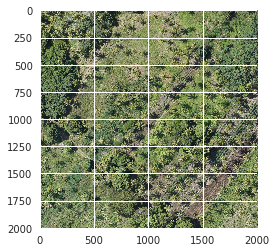

In [3]:
plt.imshow(np.asarray(img.crop((0,0,2000,2000))))

## Read Various Tree Locations

In [5]:
objs = []
# Objects go in a tuple (pd.Dataframe, color_tuple)

In [6]:
banana_tree = pd.read_csv('../data/tree_bananas/locations.json', index_col=0)
objs.append((banana_tree, (0, 0, 255, 255)))
banana_tree

,x,y
0,-175.338075,-21.087776
1,-175.338097,-21.087804
2,-175.338114,-21.087792
3,-175.338098,-21.087766
4,-175.338123,-21.087750
5,-175.338150,-21.087741
6,-175.338186,-21.087739
7,-175.338535,-21.087117
8,-175.338560,-21.087183
9,-175.338566,-21.087144


In [7]:
coco_tree = pd.read_csv('../data/tree_coconuts/locations.json', index_col=0)
objs.append((coco_tree, (255, 0, 0, 255)))
coco_tree

,x,y
0,-175.338616,-21.087592
1,-175.338541,-21.089580
2,-175.337749,-21.088268
3,-175.337780,-21.088143
4,-175.337803,-21.088248
5,-175.338165,-21.088149
6,-175.338028,-21.087524
7,-175.338004,-21.087576
8,-175.337944,-21.087596
9,-175.338017,-21.087675


In [8]:
papaya_tree = pd.read_csv('../data/tree_papayas/locations.json', index_col=0)
objs.append((papaya_tree, (255, 140, 0, 255)))
papaya_tree

,x,y
0,-175.338098,-21.089404
1,-175.338342,-21.088781
2,-175.338197,-21.089320
3,-175.337605,-21.087925
4,-175.337504,-21.087820
5,-175.337576,-21.087787
6,-175.337496,-21.087777
7,-175.337469,-21.087707
8,-175.337536,-21.087699
9,-175.337486,-21.087625


In [9]:
mango_tree = pd.read_csv('../data/tree_mangoes/locations.json', index_col=0)
objs.append((mango_tree, (138, 43, 226, 255)))
mango_tree

,x,y
0,-175.338373,-21.087813
1,-175.338659,-21.088258
2,-175.338628,-21.088080
3,-175.338604,-21.088786
4,-175.338537,-21.089484
5,-175.338207,-21.089077
6,-175.338424,-21.088793
7,-175.338719,-21.088781
8,-175.338647,-21.089023
9,-175.338833,-21.089208


In [13]:
unk_tree = pd.read_csv('../data/unknown_entities/trees_locations.json', index_col=0)
objs.append((unk_tree, (0, 0, 0, 255)))
unk_tree

,x,y
0,-175.337713,-21.099486
1,-175.337723,-21.099564
2,-175.338038,-21.099858
3,-175.337933,-21.099515
4,-175.338172,-21.099529
5,-175.338464,-21.099649
6,-175.338550,-21.099719
7,-175.338044,-21.098679
8,-175.338942,-21.097985
9,-175.338877,-21.097975


In [14]:
none_stuff = pd.read_csv('../data/unknown_entities/none_stuff_locations.json', index_col=0)
objs.append((none_stuff, (0, 0, 0, 255)))
none_stuff

,x,y
0,-175.341873,-21.106690
1,-175.340807,-21.096964
2,-175.340815,-21.097098
3,-175.340843,-21.097205
4,-175.340731,-21.096767
5,-175.339648,-21.095019
6,-175.339636,-21.095109
7,-175.339304,-21.095168
8,-175.340372,-21.102039
9,-175.340788,-21.102862


## Process and Chunk

### Coordinate Converter

In [15]:
class Converter:
    def __init__(self, gt):
        self.gt = gt
    
    def geo_2_pixel(self, x, y):
        pixel_x = (x - self.gt[0])/(self.gt[1])

        pixel_y = (y - self.gt[3])/(self.gt[5])
        
        return int(pixel_x), int(pixel_y)

### Mark trees on copy of image

In [16]:
loc_converter = Converter(datafile.GetGeoTransform())

draw_zone = ImageDraw.Draw(img)

r = 5

for df, color in objs:
    for index, row in df.iterrows():
        x, y = loc_converter.geo_2_pixel(row['x'], row['y'])
        draw_zone.ellipse((x-r, y-r, x+r, y+r), fill=color)

### Slice image

In [17]:
img_w, img_h = img.size

slice_x = 1000
slice_y = 1000

Image.MAX_IMAGE_PIXELS = None

        
for y_start in range(8):
    left = slice_x * 3
    upper = slice_y * y_start
    bbox = (left, upper, left+slice_x, upper+slice_y)
    
    working_slice = img.crop(bbox)
    working_slice.save("../data/aerial_image/slices/slice__x_"+str(left)+"-"+str(left+slice_x)+"__y_"+ \
                           str(upper)+"-"+str(upper+slice_y)+".png")

for y_start in range(22, 24):
    left = slice_x * 2
    upper = slice_y * y_start
    bbox = (left, upper, left+slice_x, upper+slice_y)
    
    working_slice = img.crop(bbox)
    working_slice.save("../data/aerial_image/slices/slice__x_"+str(left)+"-"+str(left+slice_x)+"__y_"+ \
                           str(upper)+"-"+str(upper+slice_y)+".png")

In [9]:
Image.MAX_IMAGE_PIXELS = None

crp = (3000, 13000, 4000, 14000)

working_slice = marked_img.crop(crp)
working_slice.show()

### Slice marked image

In [ ]:
img_w, img_h = marked_img.size

slice_x = 1000
slice_y = 1000

Image.MAX_IMAGE_PIXELS = None

max_y = int(math.ceil(img_h/slice_y))
max_x = int(math.ceil(img_w/slice_x))


for y_start in range(0, max_y):
    for x_start in range(0, max_x):
        left = slice_x * x_start
        upper = slice_y * y_start
        bbox = (left, upper, left+slice_x, upper+slice_y)
        working_slice = marked_img.crop(bbox)
        
        working_slice.save("../data/aerial_image/slices/marked__x_"+str(left)+"-"+str(left+slice_x)+"__y_"+ \
                           str(upper)+"-"+str(upper+slice_y)+".png")